In [2]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [3]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

In [4]:

figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_btsp_width'
misc.get_or_create_subdir(figdir)
suppfigdir =misc.get_or_create_subdir(figdir,'supp')
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)


/mnt/home/szheng/ceph/place_variability/fig/paper/figure_btsp_width
/mnt/home/szheng/ceph/place_variability/fig/paper/figure_btsp_width/supp
/mnt/home/szheng/ceph/place_variability/data/paper


'/mnt/home/szheng/ceph/place_variability/data/paper'

In [5]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [6]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
fr_map_trial_df_pyr_combined_all = prepped_data_agg['fr_map_trial_df_pyr_combined_all']
occu_map_all = prepped_data_agg['occu_map_all']
fr_map_all = prepped_data_agg['fr_map_all']

pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all_test = prepped_data_agg['var_res_all']
# corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all_test = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']

pf_params_all = prepped_data_agg['pf_params_all']
all_fields_all = prepped_data_agg['all_fields_all']

ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])
ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 



In [104]:
# gpb = spk_beh_df_all.groupby(level=(0,1),sort=False)
# index_within_to_trial_index_df_all = {}
# for k,val in gpb:
#     index_within_to_trial_index_df=dpp.index_within_to_trial_index(val.loc[k])
#     index_within_to_trial_index_df_all[k] = index_within_to_trial_index_df

In [107]:
# prepped_data_agg['index_within_to_trial_index_df_all'] = index_within_to_trial_index_df_all
# fn = 'prepped_data_agg.p'
# fn_full = os.path.join(data_dir,fn)
# pickle.dump(prepped_data_agg,open(fn_full,'wb'))


In [7]:
trial_index_to_index_within_df_all=prepped_data_agg['trial_index_to_index_within_df_all']
index_within_to_trial_index_df_all=prepped_data_agg['index_within_to_trial_index_df_all'] 

In [8]:
savefn_full = os.path.join(data_dir,'per_field_metrics_shtest_with_1cp.p')
# pickle.dump(per_field_metrics_all,open(savefn_full,'wb'))
per_field_metrics_all=pickle.load(open(savefn_full,'rb'))

# extract speed at formation trial

In [9]:
all_sw_with_metrics_d_all_on = all_sw_with_metrics_d_all.query('switch==1')
# all_sw_with_metrics_d_all_on = all_sw_with_metrics_d_all.query('switch==-1')

In [10]:
all_fields_recombined_all['field_width'] = all_fields_recombined_all['end'] - all_fields_recombined_all['start']     



In [11]:
all_sw_with_metrics_d_all_on_reind=all_sw_with_metrics_d_all_on.set_index(['trialtype','uid','field_index'],append=True)

In [12]:
# gather speed and width
gpb = all_sw_with_metrics_d_all_on_reind.groupby(level=(0,1,2,4,5,6))
sp_l = {}
fw_l = {}
field_peak_l = {}
shift_l = {}
for k,val in gpb:
    first_on_row = val.iloc[0]
    ani,sess,ti,_,tt,uid,field_id = first_on_row.name
    ind = (ani,sess,ti,tt,uid,field_id)
    sp = first_on_row['speed_gauss']
    sp_l[ind] = sp
    fw = all_fields_recombined_all.loc[ind,'field_width']
    fw_l[ind] = fw
    field_peak_l[ind] = all_fields_recombined_all.loc[ind,'peak'] # field location
    # whether backward shift
    peak_alltrial = pf_params_recombined_all.loc[(ani,sess,'peak',ti,tt,uid,field_id),:]
    sw_tr = first_on_row['trial_index']
    sw_tr_next = sw_tr+1
    sw_tr_prev = sw_tr-1
    ## shift using sw - (sw-1)
#     while np.isnan(peak_alltrial.loc[sw_tr_prev]):
#         sw_tr_prev-=1
#     shift = peak_alltrial.loc[sw_tr]-peak_alltrial.loc[sw_tr_prev] 
    ## shift using sw+1 - sw
    while np.isnan(peak_alltrial.loc[sw_tr_next]):
        sw_tr_next+=1
    shift = peak_alltrial.loc[sw_tr_next] -  peak_alltrial.loc[sw_tr] # one trial after switch minus switch
    shift_l[ind]=shift
shift_l = pd.Series(shift_l)
sp_l = pd.Series(sp_l)
fw_l = pd.Series(fw_l)
shift_l = pd.Series(shift_l)
field_peak_l = pd.Series(field_peak_l)
speed_width_df = pd.DataFrame({'Speed':sp_l,'Field width':fw_l,
                               'Field peak':field_peak_l,
                               'Peak shift': shift_l,
                              })



In [13]:
from scipy.stats.mstats import zscore
z = zscore(speed_width_df['Speed'],nan_policy='omit')
outlier_ma = z <= 6
speed_width_df_nooutlier=speed_width_df.loc[outlier_ma]

In [63]:
reload(ph)

<module 'plot_helper' from '/mnt/home/szheng/projects/util_code/plot_helper.py'>

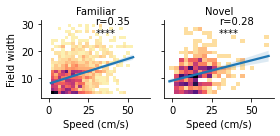

In [48]:
fig,axs=plt.subplots(1,2,figsize=(4,2),sharex=True,sharey=True)
gpb=speed_width_df_nooutlier.groupby(level=(2))
fam_nov_str_d= {0:'Familiar',1:'Novel'}
for ii,(k,val) in enumerate(gpb):
    ax=axs[ii]
    fam_nov_str=fam_nov_str_d[k]
    sns.histplot(data=val,x='Speed',y='Field width',ax=ax,cmap='magma_r')
    sns.regplot(data=val,x='Speed',y='Field width',ax=ax,scatter=False)
    r,p = scipy.stats.pearsonr(val['Speed'],val['Field width'])
    star=ph.p_to_star(p)
    ax.text(0.5,0.8,f'r={r:.02f}\n{star}',transform=ax.transAxes)
    ax.set_title(fam_nov_str)
    ax.set_xlabel('Speed (cm/s)')
    sns.despine()
plt.tight_layout()

figfn = 'width_vs_speed_sw_on'
ph.save_given_name(fig,figfn,figdir=figdir)

# control for position

In [15]:
nbins=10
# speed_width_df['Field peak bin'] = pd.cut(speed_width_df['Field peak'],nbins,retbins=False,labels=False)
speed_width_df_nooutlier['Field peak bin'] = pd.cut(speed_width_df_nooutlier['Field peak'],nbins,retbins=False,labels=False)
# pd.cut

/tmp/ipykernel_3115392/309300890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed_width_df_nooutlier['Field peak bin'] = pd.cut(speed_width_df_nooutlier['Field peak'],nbins,retbins=False,labels=False)


In [16]:
# gpb=speed_width_df.groupby(level=2)
gpb=speed_width_df_nooutlier.groupby(level=2)


In [17]:
corr_d={}

for ii,(k,val) in enumerate(gpb):

    corr=val.groupby('Field peak bin')[['Speed','Field width']].apply(lambda x:x.rcorr(stars=False))
    corr_d[k] = corr
corr_d = pd.concat(corr_d,axis=0)

In [29]:
val

Speed  Field width  Field peak  \
e13_16f1 e13_16f1_210302 0 0.0 22  1  15.862216           12          81   
                               54  2   4.871501           11          86   
                               60  0   2.542003           14          89   
                               64  2  15.291796            7          81   
                               67  2   2.554679           11          81   
...                                         ...          ...         ...   
e16_3m2  e16_3m2_211212  0 1.0 45  0  13.301271           14          84   
                               88  1  11.793135           14          88   
                               195 0   3.521424            7          88   
         e16_3m2_211213  0 0.0 93  1   4.107416            6          82   
                               192 1  11.793424            6          81   

                                      Peak shift  Field peak bin  
e13_16f1 e13_16f1_210302 0 0.0 22  1        -3.0               8  
                               54  2         0.0               8  
                               60  0        -1.0               8  
                               64  2        -1.0               8  
                               67  2        -1.0               8  
...                                          ...             ...  
e16_3m2  e16_3m2_211212  0 1.0 45  0        -3.0               8  
                               88  1        10.0               8  
                               195 0         2.0               8  
         e16_3m2_211213  0 0.0 93  1        -1.0               8  
                               192 1         2.0               8  

[183 rows x 5 columns]

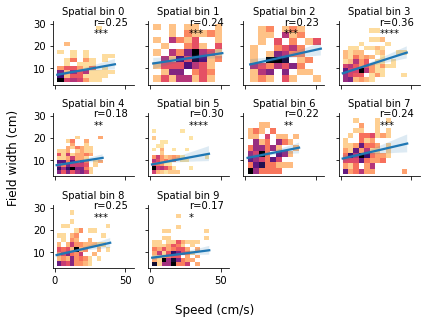

In [81]:
gpb = speed_width_df_nooutlier.groupby('Field peak bin')

nplots = len(gpb)
fig1,axs1=ph.subplots_wrapper(nplots,basewidth=1.5,baseheight=1.5,sharex=True,sharey=True)
for ax in axs1.ravel():
    ax.set_axis_off()
# fig2,axs2=ph.subplots_wrapper(nplots,basewidth=1,baseheight=1)
for ii,(peak,val) in enumerate(gpb):
    ax1=axs1.ravel()[ii]
#     ax2=axs2.ravel()[ii]
#     ax_l = [ax1,ax2]
    famnov=0
    val_famnov=val.loc[(slice(None),slice(None),famnov),:]
#     ax=ax_l[famnov]
    ax=ax1
    ax.set_axis_on()
    fam_nov_str=fam_nov_str_d[k]
    sns.histplot(data=val_famnov,x='Speed',y='Field width',ax=ax,cmap='magma_r')
    sns.regplot(data=val_famnov,x='Speed',y='Field width',ax=ax,scatter=False)
    r,p = scipy.stats.pearsonr(val['Speed'],val['Field width'])
    star=ph.p_to_star(p)
    ax.text(0.5,0.75,f'r={r:.02f}\n{star}',transform=ax.transAxes)
    ax.set_title(f'Spatial bin {int(peak)}')
    ax.set_xlabel(None)
#     ax.set_xticklabels([])
    ax.set_ylabel(None)
#     ax.set_yticklabels([])
    ax.label_outer()
fig1.supxlabel('Speed (cm/s)')
fig1.supylabel('Field width (cm)')
sns.despine()
plt.tight_layout()

fig=fig1
figfn = 'width_vs_speed_sw_on_per_spatialbin_fam'
ph.save_given_name(fig,figfn,figdir=figdir)



In [20]:
val

Speed  Field width  Field peak  \
e13_26m1 e13_26m1_211019 1 0.0  1   1   5.036446            9          76   
                                44  2  16.559947           16          56   
                                55  1  15.989576           11          66   
                                58  0   6.954948            6           0   
                                59  1   3.095082           11          67   
...                                          ...          ...         ...   
e16_3m2  e16_3m2_211213  1 both 126 0  12.676169            8           2   
                                144 0  18.525216           16           9   
                                151 0  13.160730           12           7   
                                157 0  16.931690           16          17   
                                192 0  14.044780            9          14   

                                       Peak shift  Field peak bin  
e13_26m1 e13_26m1_211019 1 0.0  1   1         0.0               7  
                                44  2        -3.0               5  
                                55  1         2.0               6  
                                58  0         0.0               0  
                                59  1        -4.0               6  
...                                           ...             ...  
e16_3m2  e16_3m2_211213  1 both 126 0        -3.0               0  
                                144 0        11.0               0  
                                151 0         6.0               0  
                                157 0         0.0               1  
                                192 0        -3.0               1  

[522 rows x 5 columns]

In [34]:
corr_d

Speed Field width
  Field peak bin                               
0 0              Speed            -       0.001
                 Field width  0.267           -
  1              Speed            -       0.041
                 Field width  0.165           -
  2              Speed            -       0.005
                 Field width  0.248           -
  3              Speed            -       0.000
                 Field width  0.405           -
  4              Speed            -       0.000
                 Field width  0.235           -
  5              Speed            -       0.005
                 Field width  0.214           -
  6              Speed            -       0.018
                 Field width  0.204           -
  7              Speed            -       0.002
                 Field width  0.229           -
  8              Speed            -       0.001
                 Field width   0.25           -
  9              Speed            -       0.015
                 Field width  0.168           -
1 0              Speed            -       0.055
                 Field width  0.209           -
  1              Speed            -       0.002
                 Field width  0.319           -
  2              Speed            -       0.199
                 Field width  0.143           -
  3              Speed            -       0.005
                 Field width   0.28           -
  4              Speed            -       0.123
                 Field width  0.172           -
  5              Speed            -       0.170
                 Field width  0.253           -
  6              Speed            -        0.33
                 Field width  0.184           -
  7              Speed            -       0.273
                 Field width  0.223           -

In [127]:
speed_width_df_novel=speed_width_df.loc[(slice(None),slice(None),1),:]

In [132]:
speed_width_df_novel.groupby(level=(0,1))[['Speed','Field width']].apply(lambda x:x.rcorr(stars=False))

Speed Field width
e13_26m1 e13_26m1_211019 Speed            -       0.000
                         Field width  0.416           -
         e13_26m1_211116 Speed            -       0.103
                         Field width  0.617           -
         e13_26m1_211119 Speed            -       0.431
                         Field width  0.099           -
e15_13f1 e15_13f1_220118 Speed            -       0.027
                         Field width  0.191           -
         e15_13f1_220119 Speed            -       0.010
                         Field width  0.324           -
         e15_13f1_220120 Speed            -       0.000
                         Field width  0.503           -
e16_3m2  e16_3m2_211212  Speed            -       0.193
                         Field width  0.249           -
         e16_3m2_211213  Speed            -       0.472
                         Field width  0.095           -

In [133]:
speed_width_df_novel.groupby(level=(0,1))[['Speed','Field width']].count()

Speed  Field width
e13_26m1 e13_26m1_211019    104          104
         e13_26m1_211116      8            8
         e13_26m1_211119     65           65
e15_13f1 e15_13f1_220118    134          135
         e15_13f1_220119     62           64
         e15_13f1_220120     61           61
e16_3m2  e16_3m2_211212      29           29
         e16_3m2_211213      60           60

# what if subselecting the backward shift ones

In [52]:
ma = (speed_width_df['Peak shift']<0) & (outlier_ma)
# ma = (speed_width_df['Peak shift']>0) & (outlier_ma)

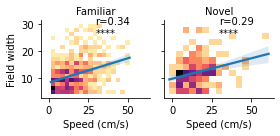

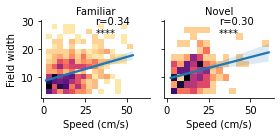

In [80]:
func_d = {'Backward':np.less,'Forward':np.greater}
for name,func in func_d.items():
    ma = func(speed_width_df['Peak shift'],0) & outlier_ma

    fig,axs=plt.subplots(1,2,figsize=(4,2),sharex=True,sharey=True)
    speed_width_df_ma = speed_width_df.loc[ma]
    gpb=speed_width_df_ma.groupby(level=(2))
    fam_nov_str_d= {0:'Familiar',1:'Novel'}
    for ii,(k,val) in enumerate(gpb):
        ax=axs[ii]
        fam_nov_str=fam_nov_str_d[k]
        sns.histplot(data=val,x='Speed',y='Field width',ax=ax,cmap='magma_r')
        sns.regplot(data=val,x='Speed',y='Field width',ax=ax,scatter=False)
        r,p = scipy.stats.pearsonr(val['Speed'],val['Field width'])
        star=ph.p_to_star(p)
        ax.text(0.5,0.8,f'r={r:.02f}\n{star}',transform=ax.transAxes)
        ax.set_title(fam_nov_str)
        ax.set_xlabel('Speed (cm/s)')
        sns.despine()
    plt.tight_layout()

    figfn = f'width_vs_speed_sw_on_{name}_subset'
    ph.save_given_name(fig,figfn,figdir=figdir)

0 0.01280147710647021
1 0.5213351168393963


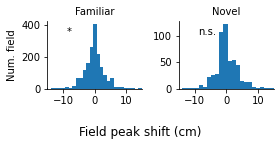

In [79]:
# shift 

fig,axs=plt.subplots(1,2,figsize=(4,2),sharex=True)
for famnov in [0,1]:
    ax=axs[famnov]
    toplot=speed_width_df.loc[(slice(None),slice(None),famnov),'Peak shift']
    toplot.hist(bins=30,ax=ax,grid=False)
    _,p=scipy.stats.wilcoxon(speed_width_df.loc[(slice(None),slice(None),famnov),'Peak shift'],alternative='less')
    print(famnov, p)
    star=ph.p_to_star(p)
    ax.text(0.2,0.8,f'{star}',transform=ax.transAxes)
    ax.set_xlim([-15,15])
    famnov_str=fam_nov_str_d[famnov]
    ax.set_title(famnov_str)
    sns.despine()
axs[0].set_ylabel('Num. field')
fig.supxlabel('Field peak shift (cm)')
plt.tight_layout()

figfn = 'peak_shift_hist'
ph.save_given_name(fig,figfn,figdir=figdir)

WilcoxonResult(statistic=41030.0, pvalue=0.5213351168393963)

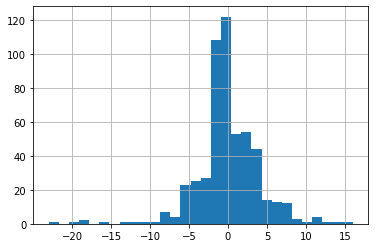

In [124]:
speed_width_df.loc[(slice(None),slice(None),1),'Peak shift'].hist(bins=30)
scipy.stats.wilcoxon(speed_width_df.loc[(slice(None),slice(None),1),'Peak shift'],alternative='less')

# what if formation trial is the trial before:
get the speed for the trial before 

In [125]:
def map_to_prev_trial(trial_ind,trialtype,trial_index_to_index_within_df,ti=0):
    if trialtype=='both':
        prev_trial = trial_ind - 1
    else:
        onett=trial_index_to_index_within_df.loc[ti,trialtype]
        ind_within=onett.loc[trial_ind]
        ma=onett==(ind_within-1)
        if ma.sum()>0:
            prev_trial=onett.index[ma][0]
        else:
            prev_trial=np.nan
    return prev_trial
        

In [135]:
speed_per_linbin_all=spk_beh_df_all.groupby(level=(0,1)).apply(lambda x:x.groupby(['task_index','trial','lin_binned'])['speed_gauss'].mean())

In [169]:
# gather speed and width
# look one trial back: if both- trial index one back; if 0/1, look for the previous ind within; if previous is nan, then drop
# look at mean speed within the field range 
gpb = all_sw_with_metrics_d_all_on_reind.groupby(level=(0,1,2,4,5,6))
sp_l = {}
fw_l = {}
for k,val in gpb:
    first_on_row = val.iloc[0]
    ani,sess,ti,_,tt,uid,field_id = first_on_row.name
    trial_ind=first_on_row['trial_index']
    trial_index_to_index_within_df = trial_index_to_index_within_df_all[ani,sess]
    prev_trial_ind = map_to_prev_trial(trial_ind,tt,trial_index_to_index_within_df,ti=ti)
    if not np.isnan(prev_trial_ind):
        prev_trial_firing=fr_mean_all_trial_one_field.loc[prev_trial_ind] > 0
        if prev_trial_firing:
            trial_ind_for_speed = prev_trial_ind
        else:
            trial_ind_for_speed = trial_ind

        ind = (ani,sess,ti,tt,uid,field_id)
        
        field_row=all_fields_recombined_all.loc[ind]
        fw = field_row['field_width']
        start,end=field_row['start'],field_row['end']
        mean_sp = speed_per_linbin_all.loc[ani,sess,ti,trial_ind_for_speed].loc[start:end].mean()
        
#         sp = first_on_row['speed_gauss']
        sp_l[ind] = mean_sp
        fw_l[ind] = fw
sp_l = pd.Series(sp_l)
fw_l = pd.Series(fw_l)
speed_width_df = pd.DataFrame({'Speed':sp_l,'Field width':fw_l})



In [170]:
from scipy.stats.mstats import zscore
z = zscore(speed_width_df['Speed'],nan_policy='omit')
outlier_ma = z <= 6
speed_width_df_nooutlier=speed_width_df.loc[outlier_ma]

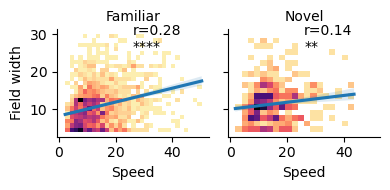

In [171]:
fig,axs=plt.subplots(1,2,figsize=(4,2),sharex=True,sharey=True)
gpb=speed_width_df_nooutlier.groupby(level=(2))
fam_nov_str_d= {0:'Familiar',1:'Novel'}
for ii,(k,val) in enumerate(gpb):
    ax=axs[ii]
    fam_nov_str=fam_nov_str_d[k]
    sns.histplot(data=val,x='Speed',y='Field width',ax=ax,cmap='magma_r')
    sns.regplot(data=val,x='Speed',y='Field width',ax=ax,scatter=False)
    r,p = scipy.stats.pearsonr(val['Speed'],val['Field width'])
    star=ph.p_to_star(p)
    ax.text(0.5,0.8,f'r={r:.02f}\n{star}',transform=ax.transAxes)
    ax.set_title(fam_nov_str)
    sns.despine()
plt.tight_layout()

# figfn = 'width_vs_speed_sw_on'
# ph.save_given_name(fig,figfn,figdir=figdir)

In [163]:
speed_per_linbin_all.loc[ani,sess,ti,trial_ind_for_speed].loc[start:end].mean()

9.10662422009222

In [ ]:
speed_per_linbin_all.loc[ani,sess,ti,trial_ind_for_speed]

In [128]:
prev_trial_ind

12.0

In [48]:
speed_width_df.rcorr()

,speed,width
speed,-,***
width,0.338,-


In [39]:
val.iloc[0]

time                                 13754.759500
speed_gauss                             14.044780
field_pos                               15.000000
trial_index                              9.000000
switch                                   1.000000
                                         ...     
post_ntrial_ge_10_perc_frac_total        0.689655
post_ntrial_ge_30_perc_frac_total        0.482759
post_ntrial_ge_50_perc_frac_total        0.241379
post_ntrial_ge_70_perc_frac_total        0.103448
post_ntrial_ge_90_perc_frac_total        0.034483
Name: (e16_3m2, e16_3m2_211213, 1, 27, both, 192, 0), Length: 86, dtype: float64

In [38]:
fw

9

In [35]:
val.index

MultiIndex([('e16_3m2', 'e16_3m2_211213', 1, 27, 'both', 192, 0)],
           names=[None, None, None, None, 'trialtype', 'uid', 'field_index'])

In [27]:
gpb = all_sw_with_metrics_d_all_on.groupby(level=(0,1,2))

trialtype  uid  field_index         time  \
e13_26m1 e13_26m1_210913 0 1        1.0   99            1  7981.808433   
                           4        1.0  150            1  7982.441933   
                           9        1.0  265            0  7965.054200   
                           11       1.0  381            0  7982.291900   
                           13       1.0  455            1  7981.308317   
...                                 ...  ...          ...          ...   
e14_2m3  e14_2m3_201118  0 18       0.0   31            0  7879.050000   
                           19       0.0   34            0  7870.714567   
                           20       0.0   35            0  7823.669317   
                           22       0.0   28            2  8065.447167   
                           24       1.0    2            0  8367.540317   

                               speed_gauss  field_pos  trial_index  switch  \
e13_26m1 e13_26m1_210913 0 1     26.377156       67.0            4     1.0   
                           4     23.947267       75.0            4     1.0   
                           9     14.924213        4.0            4     1.0   
                           11    25.249015       73.0            4     1.0   
                           13    29.155765       60.0            4     1.0   
...                                    ...        ...          ...     ...   
e14_2m3  e14_2m3_201118  0 18     2.183948       90.0           14     1.0   
                           19    27.488996       98.0           14     1.0   
                           20     3.291819       41.0           14     1.0   
                           22    25.601408       75.0           17     1.0   
                           24    13.669046        0.0           22     1.0   

                               index_within  switch_trial  ...  \
e13_26m1 e13_26m1_210913 0 1              2           2.0  ...   
                           4              2           2.0  ...   
                           9              2           2.0  ...   
                           11             2           2.0  ...   
                           13             2           2.0  ...   
...                                     ...           ...  ...   
e14_2m3  e14_2m3_201118  0 18             9           9.0  ...   
                           19             9           9.0  ...   
                           20             9           9.0  ...   
                           22            11          11.0  ...   
                           24             8           8.0  ...   

                               post_ntrial_le_10_perc_frac_total  \
e13_26m1 e13_26m1_210913 0 1                            0.000000   
                           4                            0.000000   
                           9                            0.000000   
                           11                           0.108108   
                           13                           0.000000   
...                                                          ...   
e14_2m3  e14_2m3_201118  0 18                           0.000000   
                           19                           0.000000   
                           20                           0.000000   
                           22                           0.000000   
                           24                           0.000000   

                               post_ntrial_le_30_perc_frac_total  \
e13_26m1 e13_26m1_210913 0 1                            0.000000   
                           4                            0.000000   
                           9                            0.000000   
                           11                           0.513514   
                           13                           0.054054   
...                                                          ...   
e14_2m3  e14_2m3_201118  0 18                           0.000000   
                           19                     

In [24]:
all_sw_with_metrics_d_all_on.loc[(slice(None),slice(None),0)]

trialtype  uid  field_index         time  \
e13_26m1 e13_26m1_210913 1        1.0   99            1  7981.808433   
                         4        1.0  150            1  7982.441933   
                         9        1.0  265            0  7965.054200   
                         11       1.0  381            0  7982.291900   
                         13       1.0  455            1  7981.308317   
...                               ...  ...          ...          ...   
e14_2m3  e14_2m3_201118  18       0.0   31            0  7879.050000   
                         19       0.0   34            0  7870.714567   
                         20       0.0   35            0  7823.669317   
                         22       0.0   28            2  8065.447167   
                         24       1.0    2            0  8367.540317   

                             speed_gauss  field_pos  trial_index  switch  \
e13_26m1 e13_26m1_210913 1     26.377156       67.0            4     1.0   
                         4     23.947267       75.0            4     1.0   
                         9     14.924213        4.0            4     1.0   
                         11    25.249015       73.0            4     1.0   
                         13    29.155765       60.0            4     1.0   
...                                  ...        ...          ...     ...   
e14_2m3  e14_2m3_201118  18     2.183948       90.0           14     1.0   
                         19    27.488996       98.0           14     1.0   
                         20     3.291819       41.0           14     1.0   
                         22    25.601408       75.0           17     1.0   
                         24    13.669046        0.0           22     1.0   

                             index_within  switch_trial  ...  \
e13_26m1 e13_26m1_210913 1              2           2.0  ...   
                         4              2           2.0  ...   
                         9              2           2.0  ...   
                         11             2           2.0  ...   
                         13             2           2.0  ...   
...                                   ...           ...  ...   
e14_2m3  e14_2m3_201118  18             9           9.0  ...   
                         19             9           9.0  ...   
                         20             9           9.0  ...   
                         22            11          11.0  ...   
                         24             8           8.0  ...   

                             post_ntrial_le_10_perc_frac_total  \
e13_26m1 e13_26m1_210913 1                            0.000000   
                         4                            0.000000   
                         9                            0.000000   
                         11                           0.108108   
                         13                           0.000000   
...                                                        ...   
e14_2m3  e14_2m3_201118  18                           0.000000   
                         19                           0.000000   
                         20                           0.000000   
                         22                           0.000000   
                         24                           0.000000   

                             post_ntrial_le_30_perc_frac_total  \
e13_26m1 e13_26m1_210913 1                            0.000000   
                         4                            0.000000   
                         9                            0.000000   
                         11                           0.513514   
                         13                           0.054054   
...                                                        ...   
e14_2m3  e14_2m3_201118  18                           0.000000   
                         19                           0.000000   
                         20                           0.000000   
                         22 